## Source

- Energy consumption data obtained from Appendix I: Detailed Energy Balance from page 52 of the 2023 MEMD Statistical Abstract
- Energy consumption transition data obtained from Uganda Energy Transition Plan Figure 2.3 in page 30

In [1]:
import numpy as np
import pandas as pd
import os
from utils.utils import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
edau = EDAUtils()
gu = GeneralUtils()

In [4]:
# Set up paths
CURRENT_DIR_PATH = os.getcwd()
OUTPUT_DATA_DIR_PATH = os.path.join(CURRENT_DIR_PATH, "output_data")
INPUT_DATA_DIR_PATH = os.path.join(CURRENT_DIR_PATH, "input_data")

In [6]:
# --- Select sector and set up years ---
fuel_share_sector_type  = "Industry"
industry_type = "mining"
years_full = np.arange(2015, 2101)

In [7]:
# load final energy consumption by fuel data
fuel_share_df = pd.read_csv(os.path.join(INPUT_DATA_DIR_PATH, "inen","fuel_share_pj.csv"))
fuel_share_df

,Sector,Year,Oil,Coal,Natural_gas,Electricity,Bioenergy_and_waste
0,Industry,2015,30.00,3,0,8.0,110
1,Industry,2021,35.00,5,0,10.0,100
2,Industry,2030,47.00,15,15,50.0,60
3,Industry,2050,40.00,25,35,215.0,60
4,Industry,2070,35.00,20,25,250.0,50
5,Industry,2100,30.00,15,15,280.0,40
6,Residential,2015,0.05,0,0,0.8,450
7,Residential,2021,0.10,0,0,1.0,430
8,Residential,2030,60.00,0,0,50.0,120
9,Residential,2050,70.00,0,0,187.0,33


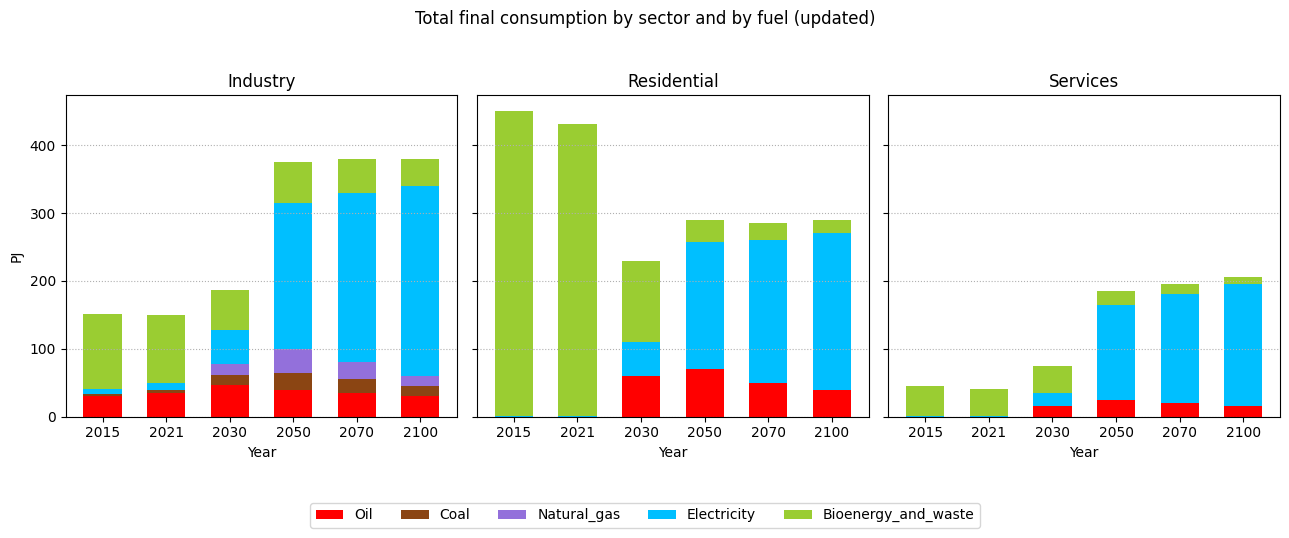

In [8]:
# Set color map matching the original plot
fuel_colors = {
    'Oil': 'red',
    'Coal': 'saddlebrown',
    'Natural_gas': 'mediumpurple',
    'Electricity': 'deepskyblue',
    'Bioenergy_and_waste': 'yellowgreen'
}

# Plotting
sectors = fuel_share_df['Sector'].unique()
years = [2015, 2021, 2030, 2050, 2070, 2100]  # Updated years to include 2100
fuels = ['Oil', 'Coal', 'Natural_gas', 'Electricity', 'Bioenergy_and_waste']

fig, axes = plt.subplots(1, len(sectors), figsize=(13,5), sharey=True)

bar_width = 0.6  # Wider bars

for i, sector in enumerate(sectors):
    ax = axes[i]
    sector_data = fuel_share_df[fuel_share_df['Sector'] == sector].sort_values('Year')
    x = range(len(years))
    bottom = [0] * len(years)
    for fuel in fuels:
        ax.bar(x, sector_data[fuel], width=bar_width, bottom=bottom, label=fuel if i == 0 else "", color=fuel_colors[fuel])
        bottom = [a + b for a, b in zip(bottom, sector_data[fuel])]
    ax.set_title(sector)
    ax.set_xticks(x)
    ax.set_xticklabels(years)
    if i == 0:
        ax.set_ylabel('PJ')
    ax.set_xlabel('Year')
    ax.grid(axis='y', linestyle=':')

fig.suptitle('Total final consumption by sector and by fuel (updated)')
fig.legend(fuels, loc='lower center', ncol=len(fuels), bbox_to_anchor=(0.5, -0.07))
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

In [9]:
# load final energy consumption by fuel data
consump_by_fuel_df = pd.read_csv(os.path.join(INPUT_DATA_DIR_PATH, "inen","final_energy_consumption_by_fuel_uganda_2023.csv"))
consump_by_fuel_df.head()

,Sector,Oil Products Total,LPG,Gasoline,Jet Kerosene,Other Kerosene,Gas/Diesel Oil,Fuel oil,Solid Biofuels Total,Wood fuel,...,Other vegetal waste,Animal waste,Biomass briquettes,Charcoal,Biogas,Electricity Total,Hydro,Solar PV,Electricity,Total
0,Iron and steel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,193,0,0,193,193
1,Chemical (including petrochemical),32,0,0,0,32,0,0,0,0,...,0,0,0,0,0,0,0,0,0,32
2,Non-metallic minerals,0,0,0,0,0,0,0,545,545,...,0,0,0,0,0,0,0,0,0,545
3,Machinery,394,0,97,0,0,297,0,0,0,...,0,0,0,0,0,0,0,0,0,394
4,"Food, beverages and tobacco",0,0,0,0,0,0,0,685,293,...,0,0,0,392,0,52,0,0,52,737


In [10]:
# Aggregate some fields
consump_by_fuel_df["Kerosene"] = consump_by_fuel_df["Jet Kerosene"] + consump_by_fuel_df["Other Kerosene"]
consump_by_fuel_df["Solid biomass"] = consump_by_fuel_df["Wood fuel"] + consump_by_fuel_df["Bagasse"] + consump_by_fuel_df["Rice husks"] + consump_by_fuel_df["Other vegetal waste"] +  consump_by_fuel_df["Animal waste"] + consump_by_fuel_df["Biomass briquettes"] + consump_by_fuel_df["Charcoal"]
consump_by_fuel_df["Electricity_and_hydro"] = consump_by_fuel_df["Electricity"] + consump_by_fuel_df["Hydro"]
consump_by_fuel_df["Diesel"] = consump_by_fuel_df["Gas/Diesel Oil"] * 0.90
consump_by_fuel_df["Furnace gas"] = consump_by_fuel_df["Gas/Diesel Oil"] * 0.10
consump_by_fuel_df["Natural gas"] = consump_by_fuel_df["Gas/Diesel Oil"] * 0.00
consump_by_fuel_df.head()

,Sector,Oil Products Total,LPG,Gasoline,Jet Kerosene,Other Kerosene,Gas/Diesel Oil,Fuel oil,Solid Biofuels Total,Wood fuel,...,Hydro,Solar PV,Electricity,Total,Kerosene,Solid biomass,Electricity_and_hydro,Diesel,Furnace gas,Natural gas
0,Iron and steel,0,0,0,0,0,0,0,0,0,...,0,0,193,193,0,0,193,0.0,0.0,0.0
1,Chemical (including petrochemical),32,0,0,0,32,0,0,0,0,...,0,0,0,32,32,0,0,0.0,0.0,0.0
2,Non-metallic minerals,0,0,0,0,0,0,0,545,545,...,0,0,0,545,0,545,0,0.0,0.0,0.0
3,Machinery,394,0,97,0,0,297,0,0,0,...,0,0,0,394,0,0,0,267.3,29.7,0.0
4,"Food, beverages and tobacco",0,0,0,0,0,0,0,685,293,...,0,0,52,737,0,685,52,0.0,0.0,0.0


In [11]:
consump_by_fuel_df["Sector"]

0                            Iron and steel
1        Chemical (including petrochemical)
2                     Non-metallic minerals
3                                 Machinery
4               Food, beverages and tobacco
5                                      Road
6                                      Rail
7                       Domestic navigation
8                         Domestic aviation
9                                Households
10           Commercial and Public Services
11        Agriculture, Forestry and Fishing
12    Non-specified (HH, Com. & PS., Agri.)
13                           Non-energy use
14                         Industry - Total
15                        Transport - Total
16                        Final consumption
Name: Sector, dtype: object

In [12]:

sector_type = "Non-metallic minerals"

In [13]:
# Filter consumption data for the specific sector
consump_by_fuel_df_filtered = consump_by_fuel_df[consump_by_fuel_df["Sector"] == sector_type]
consump_by_fuel_df_filtered

,Sector,Oil Products Total,LPG,Gasoline,Jet Kerosene,Other Kerosene,Gas/Diesel Oil,Fuel oil,Solid Biofuels Total,Wood fuel,...,Hydro,Solar PV,Electricity,Total,Kerosene,Solid biomass,Electricity_and_hydro,Diesel,Furnace gas,Natural gas
2,Non-metallic minerals,0,0,0,0,0,0,0,545,545,...,0,0,0,545,0,545,0,0.0,0.0,0.0


In [14]:
import numpy as np

# Map logical fuel names to (numerator column, denominator column)
fuel_share_map = {
    "Diesel": ("Diesel", "Oil Products Total"),
    "Kerosene": ("Kerosene", "Oil Products Total"),
    "Oil": ("Fuel oil", "Oil Products Total"),
    "Gasoline": ("Gasoline", "Oil Products Total"),
    "Hydrocarbon_Gas_Liquids": ("LPG", "Oil Products Total"),
    "Electricity": ("Electricity_and_hydro", "Electricity Total"),
    "Solar": ("Solar PV", "Electricity Total"),
    "Solid Biomass": ("Solid biomass", "Solid Biofuels Total"),
}

SMALL = 1e-6

fuel_type_shares = {}
for fuel, (num_col, denom_col) in fuel_share_map.items():
    num = consump_by_fuel_df_filtered[num_col].values[0]
    denom = consump_by_fuel_df_filtered[denom_col].values[0]
    # Use max to ensure denom is not zero (prevents inf)
    fuel_type_shares[fuel] = num / max(denom, SMALL)

print(fuel_type_shares)


{'Diesel': np.float64(0.0), 'Kerosene': np.float64(0.0), 'Oil': np.float64(0.0), 'Gasoline': np.float64(0.0), 'Hydrocarbon_Gas_Liquids': np.float64(0.0), 'Electricity': np.float64(0.0), 'Solar': np.float64(0.0), 'Solid Biomass': np.float64(1.0)}


In [15]:
# Manually edit the fuel type shares to simulate transistion from solid biomass to electricity
fuel_type_shares["Diesel"] = 0.2
fuel_type_shares["Kerosene"] = 0.2
fuel_type_shares["Oil"] = 0.2
fuel_type_shares["Gasoline"] = 0.2
fuel_type_shares["Hydrocarbon_Gas_Liquids"] = 0.2
fuel_type_shares["Electricity"] = 1.0
fuel_type_shares

{'Diesel': 0.2,
 'Kerosene': 0.2,
 'Oil': 0.2,
 'Gasoline': 0.2,
 'Hydrocarbon_Gas_Liquids': 0.2,
 'Electricity': 1.0,
 'Solar': np.float64(0.0),
 'Solid Biomass': np.float64(1.0)}

In [16]:
agg_map = {
    "Oil": ["Diesel", "Kerosene", "Oil", "Gasoline", "Hydrocarbon_Gas_Liquids"],
    "Electricity": ["Electricity", "Solar"],
    "Bioenergy_and_waste": ["Solid Biomass"],
    # The following are handled manually
    "Coal": ["Coal", "Coke"],
    "Natural_gas": ["Natural gas", "Furnace gas"],
}

manual_frac_in_agg = {}

for agg, subfuels in agg_map.items():
    if agg in ["Oil", "Electricity", "Bioenergy_and_waste"]:
        # For these, populate using fuel_type_shares, setting 0 if not found
        manual_frac_in_agg[agg] = {
            subfuel: fuel_type_shares.get(subfuel, 0) for subfuel in subfuels
        }
manual_frac_in_agg["Coal"] = {"Coal": 1, "Coke": 0}
manual_frac_in_agg["Natural_gas"] = {"Natural gas": 1, "Furnace gas": 0}
manual_frac_in_agg["Hydrogen"] = {"Hydrogen": 0}

manual_frac_in_agg

{'Oil': {'Diesel': 0.2,
  'Kerosene': 0.2,
  'Oil': 0.2,
  'Gasoline': 0.2,
  'Hydrocarbon_Gas_Liquids': 0.2},
 'Electricity': {'Electricity': 1.0, 'Solar': np.float64(0.0)},
 'Bioenergy_and_waste': {'Solid Biomass': np.float64(1.0)},
 'Coal': {'Coal': 1, 'Coke': 0},
 'Natural_gas': {'Natural gas': 1, 'Furnace gas': 0},
 'Hydrogen': {'Hydrogen': 0}}

In [17]:
# Prepare fuel_share_df for the selected sector and interpolate
sector_mask = fuel_share_df["Sector"] == fuel_share_sector_type   # Change as needed
fuel_share_sector = fuel_share_df[sector_mask].copy()
fuel_share_sector

,Sector,Year,Oil,Coal,Natural_gas,Electricity,Bioenergy_and_waste
0,Industry,2015,30.0,3,0,8.0,110
1,Industry,2021,35.0,5,0,10.0,100
2,Industry,2030,47.0,15,15,50.0,60
3,Industry,2050,40.0,25,35,215.0,60
4,Industry,2070,35.0,20,25,250.0,50
5,Industry,2100,30.0,15,15,280.0,40


In [18]:
# --- Filter, interpolate, and ffill high-level shares ---
agg_cols = ["Oil", "Coal", "Natural_gas", "Electricity", "Bioenergy_and_waste"]
sector_df = fuel_share_df[fuel_share_df["Sector"] == sector].copy()
sector_df = sector_df.set_index("Year").reindex(years_full)
sector_df[agg_cols] = sector_df[agg_cols].interpolate(method="linear").ffill()
sector_df["Year"] = sector_df.index

In [19]:
detailed_fuels = [
    "Diesel", "Kerosene", "Oil", "Gasoline", "Hydrocarbon_Gas_Liquids",
    "Coal", "Coke",
    "Natural gas", "Furnace gas",
    "Electricity", "Solar",
    "Solid biomass",
    "Hydrogen"
]


In [20]:
output_rows = []
for year, row in sector_df.iterrows():
    out_row = {"year": int(year)}
    # For each aggregate, allocate to detailed fuels
    for agg, details in manual_frac_in_agg.items():
        agg_val = row.get(agg, 0)
        for fuel, frac in details.items():
            colname = f"frac_inen_energy_{industry_type}_{fuel.lower().replace(' ', '_')}"
            out_row[colname] = agg_val * frac
    # Hydrogen: always zero for Uganda in this context
    out_row[f"frac_inen_energy_{industry_type}_hydrogen"] = 0
    output_rows.append(out_row)

result_df = pd.DataFrame(output_rows)

In [21]:
# --- Normalize so fractions sum to 1 (excluding year) ---
detailed_cols = [col for col in result_df.columns if col != "year"]
result_df[detailed_cols] = result_df[detailed_cols].div(result_df[detailed_cols].sum(axis=1), axis=0)


In [22]:
# --- Order columns ---
result_df = result_df[["year"] + detailed_cols]

In [23]:
# # Fill values before 2021 with the first known year (2021) using ffill() and bbfill()
# result_df[detailed_cols] = (
#     result_df[detailed_cols]
#     .ffill()
#     .bfill()
# )

In [24]:
result_df.tail()

,year,frac_inen_energy_mining_diesel,frac_inen_energy_mining_kerosene,frac_inen_energy_mining_oil,frac_inen_energy_mining_gasoline,frac_inen_energy_mining_hydrocarbon_gas_liquids,frac_inen_energy_mining_electricity,frac_inen_energy_mining_solar,frac_inen_energy_mining_solid_biomass,frac_inen_energy_mining_coal,frac_inen_energy_mining_coke,frac_inen_energy_mining_natural_gas,frac_inen_energy_mining_furnace_gas,frac_inen_energy_mining_hydrogen
81,2096,0.015385,0.015385,0.015385,0.015385,0.015385,0.870704,0.0,0.052373,0.0,0.0,0.0,0.0,0.0
82,2097,0.015196,0.015196,0.015196,0.015196,0.015196,0.872549,0.0,0.051471,0.0,0.0,0.0,0.0,0.0
83,2098,0.015008,0.015008,0.015008,0.015008,0.015008,0.874388,0.0,0.050571,0.0,0.0,0.0,0.0,0.0
84,2099,0.014821,0.014821,0.014821,0.014821,0.014821,0.876221,0.0,0.049674,0.0,0.0,0.0,0.0,0.0
85,2100,0.014634,0.014634,0.014634,0.014634,0.014634,0.878049,0.0,0.048780,0.0,0.0,0.0,0.0,0.0


In [25]:
# # project forward
# frac_inen_energy_df_extended = gu.extend_projection(result_df, 2050 + 1, 2100)
# frac_inen_energy_df_extended

In [26]:
df_sm_hp = gu.smooth_timeseries_df(result_df, method="hp", hp_lambda=100)

/opt/miniconda3/envs/ssp_uganda_env/lib/python3.11/site-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


In [27]:
frac_inen_energy_df_extended = df_sm_hp.copy()

## Validation

In [28]:
# check for duplicates
gu.check_duplicates(frac_inen_energy_df_extended)

No duplicated years found in the DataFrame.
No duplicated rows found in the DataFrame.


In [29]:
# load global data
uga_global_df = pd.read_csv(os.path.join(INPUT_DATA_DIR_PATH, "sisepuede_raw_global_inputs_uganda.csv"))
uga_global_df.head()

,frac_agrc_nuts_cl1_temperate,yf_agrc_cereals_tonne_ha,frac_agrc_rice_cl2_wet,frac_agrc_cereals_cl1_tropical,frac_agrc_tubers_cl1_tropical,pop_lvst_initial_chickens,frac_agrc_bevs_and_spices_cl2_wet,frac_agrc_tubers_cl2_wet,frac_frst_primary_cl1_temperate_nutrient_rich,frac_lndu_grasslands_cl2_dry,...,nemomod_entc_frac_min_share_production_pp_biogas,nemomod_entc_frac_min_share_production_pp_coal,nemomod_entc_frac_min_share_production_pp_coal_ccs,nemomod_entc_frac_min_share_production_pp_gas,nemomod_entc_frac_min_share_production_pp_gas_ccs,nemomod_entc_frac_min_share_production_pp_geothermal,nemomod_entc_frac_min_share_production_pp_nuclear,nemomod_entc_frac_min_share_production_pp_ocean,nemomod_entc_frac_min_share_production_pp_waste_incineration,nemomod_entc_frac_min_share_production_pp_wind
0,0.030468,1.805033,0.988021,0.969532,0.969532,46039000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.030468,1.832342,0.988021,0.969532,0.969532,46291000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.030468,1.827437,0.988021,0.969532,0.969532,47578000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.030468,1.935353,0.988021,0.969532,0.969532,48901000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.030468,2.003586,0.988021,0.969532,0.969532,43121000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
print(gu.check_row_sums_to_one(frac_inen_energy_df_extended))

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True]), np.True_)


Comparing frac_inen_energy_mining_diesel...


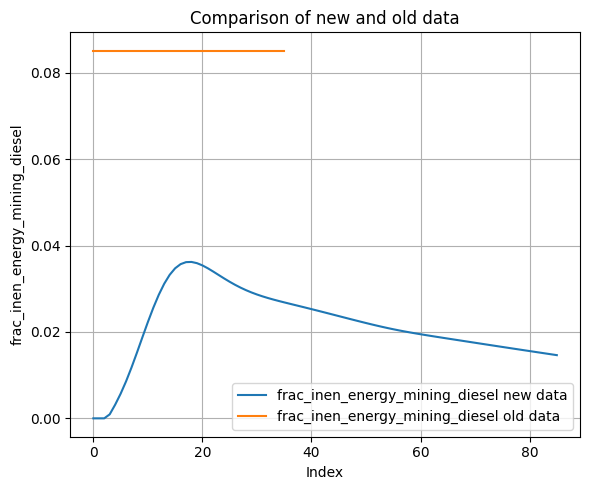

Comparing frac_inen_energy_mining_kerosene...


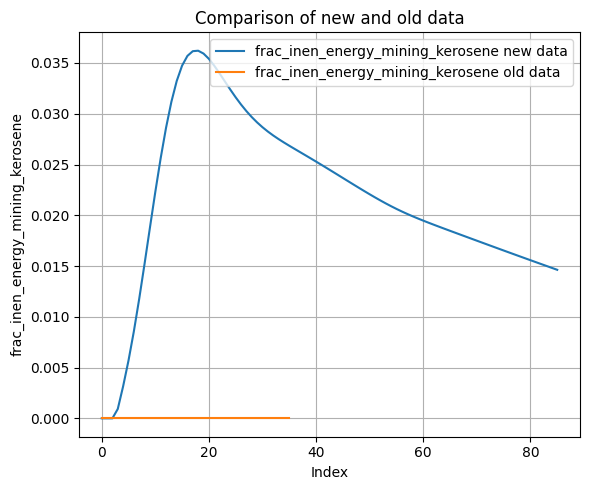

Comparing frac_inen_energy_mining_oil...


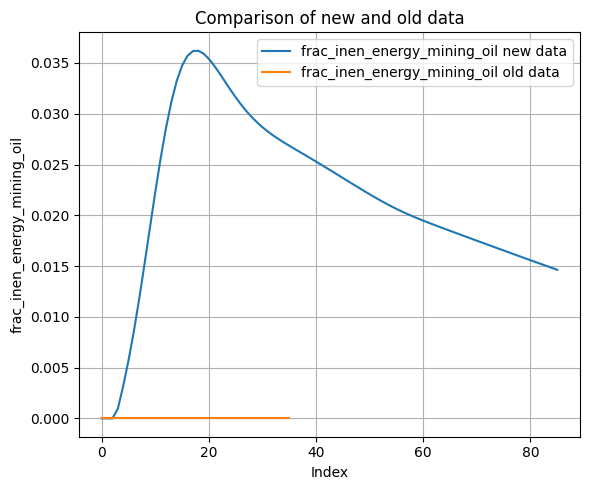

Comparing frac_inen_energy_mining_gasoline...


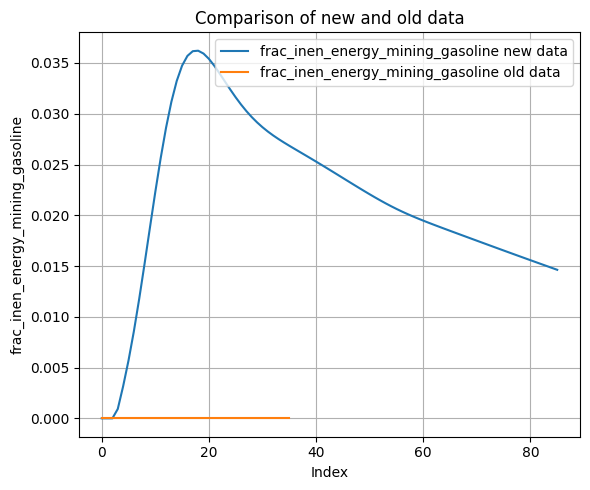

Comparing frac_inen_energy_mining_hydrocarbon_gas_liquids...


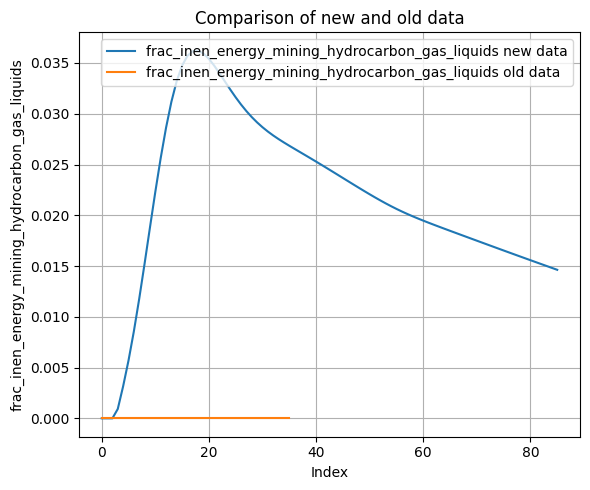

Comparing frac_inen_energy_mining_electricity...


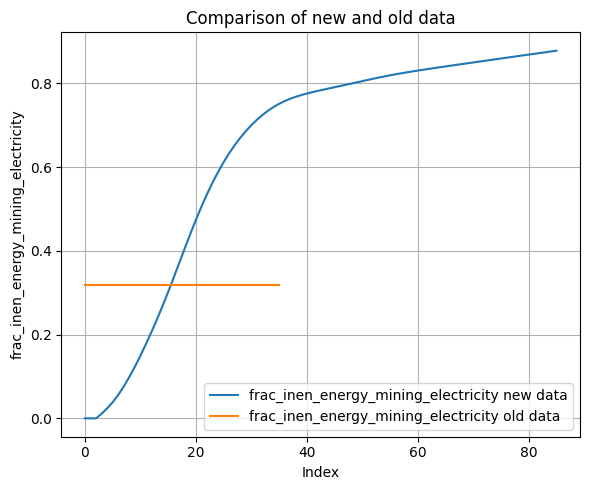

Comparing frac_inen_energy_mining_solar...


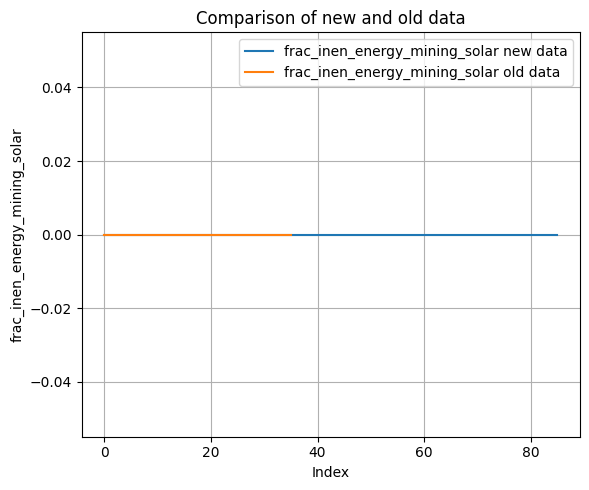

Comparing frac_inen_energy_mining_solid_biomass...


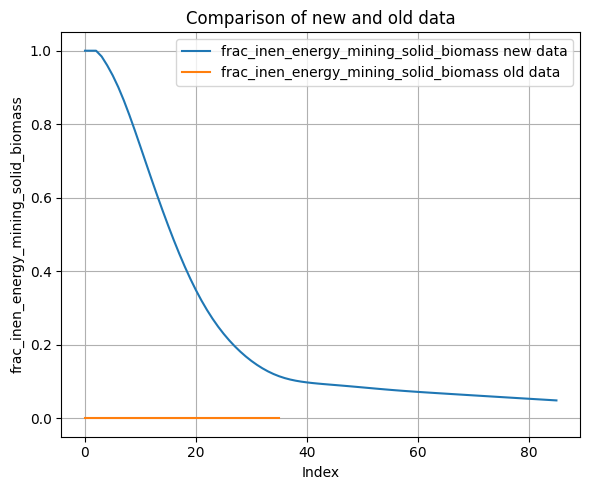

Comparing frac_inen_energy_mining_coal...


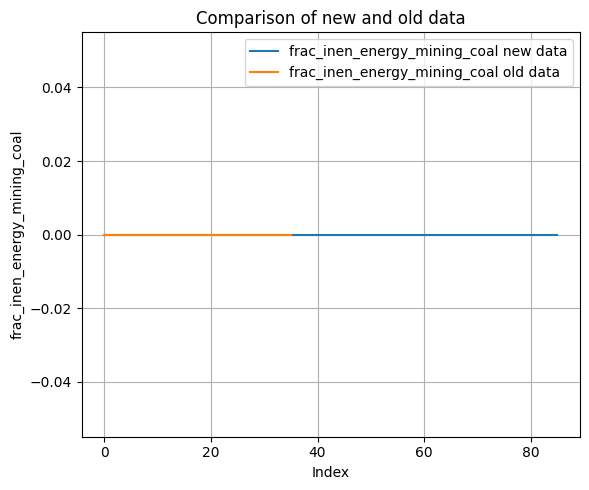

Comparing frac_inen_energy_mining_coke...


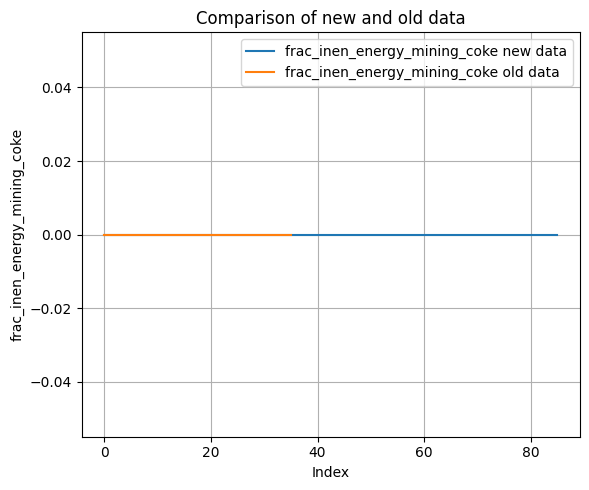

Comparing frac_inen_energy_mining_natural_gas...


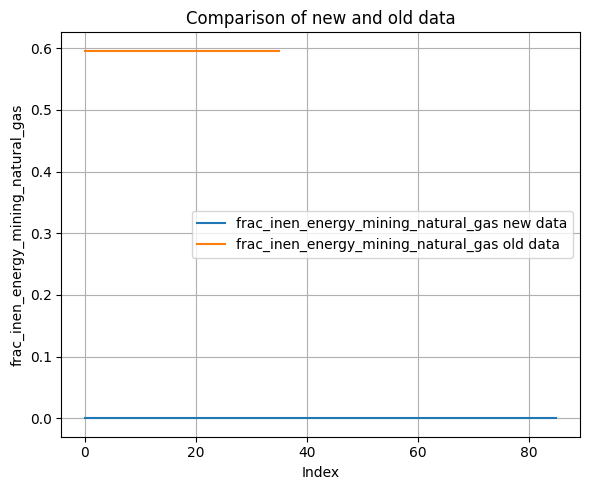

Comparing frac_inen_energy_mining_furnace_gas...


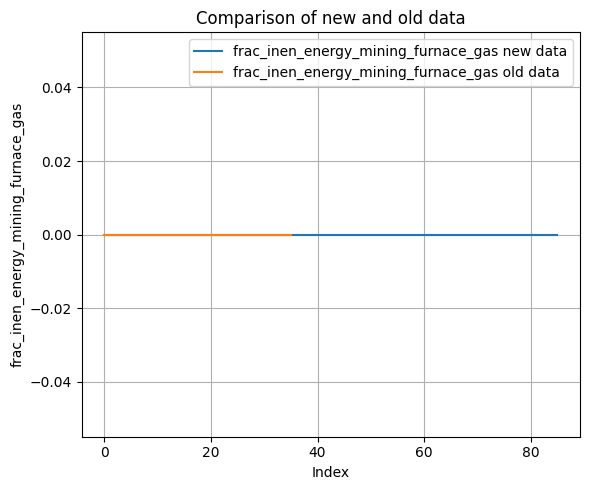

Comparing frac_inen_energy_mining_hydrogen...


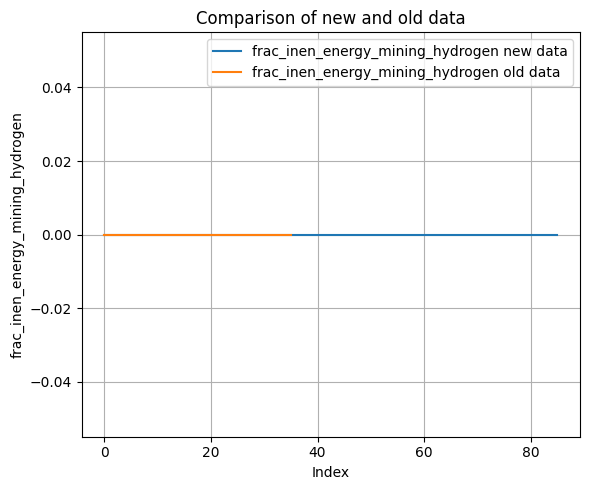

In [31]:
for var in frac_inen_energy_df_extended.columns:
    if var != 'year':
        print(f"Comparing {var}...")
        edau.compare_variables(frac_inen_energy_df_extended, uga_global_df, [var])

In [32]:
frac_inen_energy_df_extended.to_csv(os.path.join(OUTPUT_DATA_DIR_PATH, f"frac_inen_energy_{industry_type}.csv"), index=False)